In [24]:
## Import necessary libraries
# Pandas for reading .csv
# Numpy for complex math
# Matplotlib for graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [25]:
def length(loc1,loc2):
    x1 = loc1[0]
    y1 = loc1[1]
    z1 = loc1[2]
    x2 = loc2[0]
    y2 = loc2[1]
    z2 = loc2[2]
    a = x1-x2
    b = y1-y2
    c = z1-z2
    return np.sqrt(a**2+b**2+c**2)

def slope(x1,x2,y1,y2):
    return (y2-y1)/(x2-x1)

def invert_slope(slp):
    return -(1/slp)

def cube_root(num):
    return num ** (1. / 3)

def draw_circle(sub_ax,x,y,r):
    circle = patches.Circle((x,y),r,linewidth=2,edgecolor='r',facecolor='none')
    sub_ax.add_patch(circle)
    
def translate(pos1, trans, scalar):
    trans = np.multiply(scalar, trans)
    return [pos1[0]+trans[0],pos1[1]+trans[1],pos1[2]+trans[2]]

def rotate2d(loc, theta):
    radians = np.deg2rad(theta)
    nX = (loc[0]*np.cos(radians))-(loc[1]*np.sin(radians))
    nY = (loc[1]*np.cos(radians))-(loc[0]*np.sin(radians))
    return [nX,nY,loc[2]]

def intersect(line1,line2):
    m1 = line1[0]
    b1 = line1[1]
    m2 = line2[0]
    b2 = line2[1]
    x = (b2-b1)/(m1-m2)
    y = m1*x+b1
    return [x,y]

def lineFromPoints(pt1,pt2):
    x1 = pt1[0]
    y1 = pt1[1]
    x2 = pt2[0]
    y2 = pt2[1]
    m = (y2-y1)/(x2-x1)
    b = y1-(x1*m)
    return [m,b]

def angle2slope(angle):
    radians = np.deg2rad(angle)
    return 1/(np.tan(radians))

In [26]:
mineral_locations = [[81.28,162.56,0],[121.92,121.92,0],[162.56,81.28,0]] #0: left 1: middle 2: right
mineral_width = 3.5
camera_data = pd.read_csv('data_files/ScaledLocs.csv',index_col=0)
num_images = camera_data.shape[0]
parsed_data = []
camera_data_list = camera_data.values
for i in range(0,num_images):
    image_loc = 'data_files/000'+str(i+1)+'.png'
    img = mpimg.imread(image_loc)
    parsed_data.append([camera_data_list[i],img])
camera_data.head()
#print parsed_data

,x,y,z,xr,yr,zr
frame,,,,,,
1,-45.01910,-18.26810,21.248,0,0,173.4930
2,-28.55930,-11.93800,21.248,0,0,167.0320
3,-58.83100,-5.88361,21.248,0,0,179.8480
4,-10.04920,-31.99800,21.248,0,0,101.5520
5,-7.52653,-53.18820,21.248,0,0,94.7091


In [27]:
print parsed_data[0][0]

[-45.0191 -18.2681  21.248    0.       0.     173.493 ]


In [28]:
## Old try
'''
dist = length(parsed_data[0][0],mineral_locations[1])
print dist
theta = np.degrees(np.arctan(mineral_width/dist))
print theta

slope = slope(parsed_data[0][0][0],mineral_locations[1][0],parsed_data[0][0][1],mineral_locations[1][0])
slope_inv = invert_slope(slope)
print slope
print slope_inv
b = -(slope_inv*mineral_locations[1][0])+mineral_locations[1][1]
b2 = np.arctan(b) % 
'''

'\ndist = length(parsed_data[0][0],mineral_locations[1])\nprint dist\ntheta = np.degrees(np.arctan(mineral_width/dist))\nprint theta\n\nslope = slope(parsed_data[0][0][0],mineral_locations[1][0],parsed_data[0][0][1],mineral_locations[1][0])\nslope_inv = invert_slope(slope)\nprint slope\nprint slope_inv\nb = -(slope_inv*mineral_locations[1][0])+mineral_locations[1][1]\nb2 = np.arctan(b) % \n'

In [33]:
## New Try!
cam_loc_orig = [parsed_data[0][0][0], parsed_data[0][0][1], parsed_data[0][0][2]]
cam_rot_orig = [parsed_data[0][0][3], parsed_data[0][0][4], parsed_data[0][0][5]]
minera_num = 2
min_loc_orig = [mineral_locations[minera_num][0], mineral_locations[minera_num][1], mineral_locations[minera_num][2]]

min_loc = translate(min_loc_orig, cam_loc_orig, -1)
min_loc = rotate2d(min_loc,-(cam_rot_orig[2]))

cam_loc = [0,0,0]
cam_rot = [0,0,0]

horiz_line = [0,2]

min1_line = lineFromPoints(min_loc,cam_loc)
min1_intersect = intersect(horiz_line, min1_line)

fov_line_r = [angle2slope(cam_rot_orig[2]),0]
r_intersect = intersect(horiz_line, fov_line_r)

fov_line_l = [-(angle2slope(cam_rot_orig[2])),0]
l_intersect = intersect(horiz_line, fov_line_l)

dist = abs(r_intersect[0]-l_intersect[0])
min1_dist_l = abs(min1_intersect[0]-l_intersect[0])
#percentage = min1_dist_l/dist
percentage = 1-(dist/min1_dist_l)
print percentage

0.9077267469770873


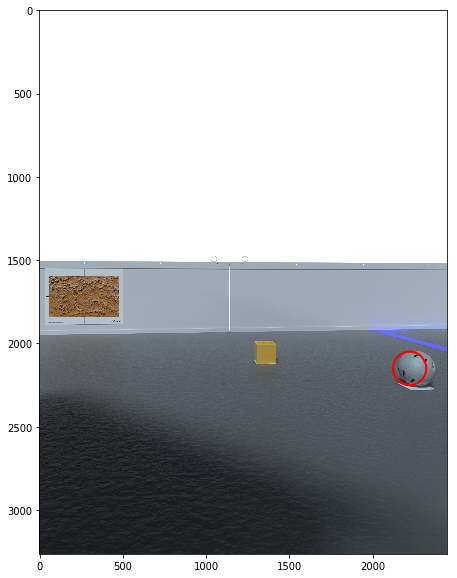

In [34]:
img_size = parsed_data[0][1].shape
fig,ax = plt.subplots(1,figsize=(20, 10))
ax.imshow(parsed_data[0][1])
draw_circle(ax, img_size[1]*percentage, 2150, 100)
#draw_circle(ax,1355,2055,100)
#draw_circle(ax,2275,2150,125)
plt.show()